**ACME-HappinessSurvey2020**
*Classification Model*

In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in Dataset

Dataset =pd.read_csv('C:\\Users\\Public\\ACME-HappinessSurvey2020.csv')
Dataset.rename (columns = {'Y':'target attribute','X1':'my order was delivered on time', 'X2':'contents of my order was as I expected',
                 'X3':'I ordered everything I wanted to order','X4':'I paid a good price for my order',
                 'X5':'I am satisfied with my courier', 'X6':'the app makes ordering easy for me'}, inplace=True)
Dataset.head(5)

,target attribute,my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid a good price for my order,I am satisfied with my courier,the app makes ordering easy for me
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
Dataset.shape

(126, 7)

In [17]:
# Correlation (For selecting the most correlated feature to the target)

Dataset.corr()

,target attribute,my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid a good price for my order,I am satisfied with my courier,the app makes ordering easy for me
target attribute,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
my order was delivered on time,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
contents of my order was as I expected,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
I ordered everything I wanted to order,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
I paid a good price for my order,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
I am satisfied with my courier,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
the app makes ordering easy for me,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


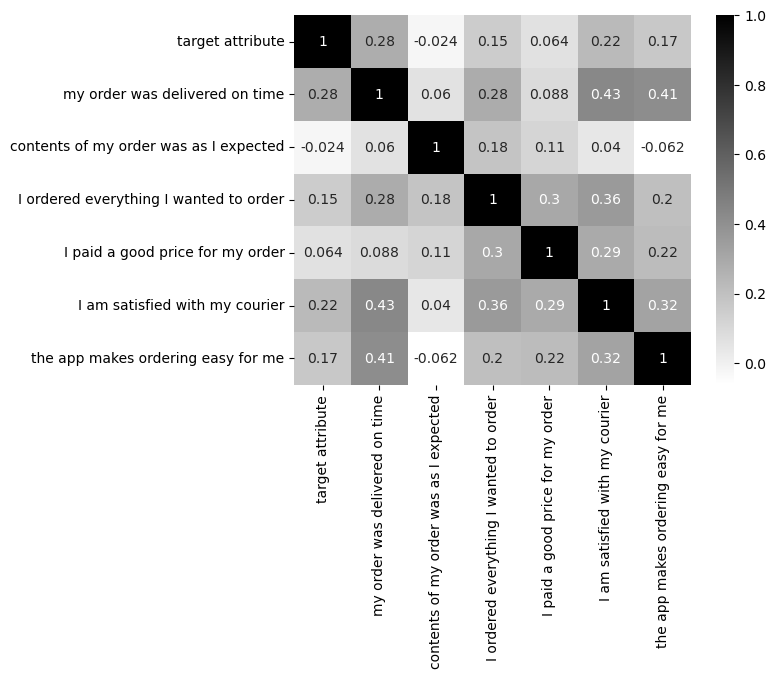

In [18]:
import seaborn as sns
cor = Dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.binary)
plt.show()

In [19]:
corr_matrix2 = Dataset.corr()
print(corr_matrix2['target attribute'].sort_values(ascending=False))

target attribute                          1.000000
my order was delivered on time            0.280160
I am satisfied with my courier            0.224522
the app makes ordering easy for me        0.167669
I ordered everything I wanted to order    0.150838
I paid a good price for my order          0.064415
contents of my order was as I expected   -0.024274
Name: target attribute, dtype: float64


In [20]:
Dataset = Dataset.drop(['I paid a good price for my order','contents of my order was as I expected'], axis=1)
Dataset.head()

,target attribute,my order was delivered on time,I ordered everything I wanted to order,I am satisfied with my courier,the app makes ordering easy for me
0,0,3,3,2,4
1,0,3,3,4,3
2,1,5,3,3,5
3,0,5,3,3,5
4,0,5,3,3,5


# function to select all the highly correlated features

def correlation (dataset, threshold):
    col_corr = set() # set for all the correlated features
    corr_matrix = dataset.corr()
    for i in range (len (corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # for abs coeff values
                colname = corr_matrix.columns[i] # gets name of column
                col_corr.add(colname)
    return col_corr

#corr_features = correlation (Dataset, 0.4)
#corr_features

In [21]:


y = Dataset ['target attribute']
y



0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: target attribute, Length: 126, dtype: int64

In [22]:
X = Dataset.drop('target attribute', axis=1)
X

,my order was delivered on time,I ordered everything I wanted to order,I am satisfied with my courier,the app makes ordering easy for me
0,3,3,2,4
1,3,3,4,3
2,5,3,3,5
3,5,3,3,5
4,5,3,3,5
...,...,...,...,...
121,5,3,4,3
122,5,3,2,5
123,5,3,4,5
124,4,3,4,5


In [23]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Scaled_data = scalar.fit_transform(X)
Scaled_data

array([[-1.67332005, -0.30364219, -1.44416589, -0.31506076],
       [-1.67332005, -0.30364219,  0.30549663, -1.55561249],
       [ 0.83666003, -0.30364219, -0.56933463,  0.92549097],
       [ 0.83666003, -0.30364219, -0.56933463,  0.92549097],
       [ 0.83666003, -0.30364219, -0.56933463,  0.92549097],
       [ 0.83666003, -0.30364219,  1.18032789,  0.92549097],
       [-1.67332005, -1.28464005, -2.31899715, -1.55561249],
       [ 0.83666003,  0.67735566,  0.30549663,  0.92549097],
       [-0.41833001,  0.67735566,  0.30549663, -0.31506076],
       [-0.41833001,  0.67735566,  1.18032789,  0.92549097],
       [-1.67332005, -0.30364219, -1.44416589, -1.55561249],
       [-0.41833001, -0.30364219,  0.30549663, -0.31506076],
       [ 0.83666003,  0.67735566,  1.18032789,  0.92549097],
       [-0.41833001,  0.67735566,  0.30549663, -1.55561249],
       [-0.41833001, -0.30364219,  0.30549663, -1.55561249],
       [-1.67332005,  0.67735566,  0.30549663, -0.31506076],
       [ 0.83666003,  0.

In [ ]:
#Import the models

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


In [24]:
X_train, X_test, y_train, y_test = train_test_split(Scaled_data, y, test_size=0.2, random_state= 42)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [27]:
y_pred1 = lr.predict(X_test)
y_pred2 = svc.predict(X_test)

In [28]:
confusion_matrix (y_test, y_pred1)

array([[ 4, 11],
       [ 3,  8]], dtype=int64)

In [29]:
confusion_matrix (y_test, y_pred2)

array([[ 4, 11],
       [ 1, 10]], dtype=int64)

In [30]:
accuracy_score (y_test, y_pred1)

0.46153846153846156

In [31]:
accuracy_score (y_test, y_pred2)

0.5384615384615384